In [2]:
#from ava_functions import *

In [3]:
## rigettando anche sulla base del ppp

In [4]:
#import os
#os.chdir('../../../Desktop/Criticality in barrel cortex')

In [94]:
#from power import *
##from powerlaw_fit import *
#from stats import *
import matplotlib.cm as cm
cmap = cm.tab10

In [6]:
from statsmodels.tsa.stattools import acf
def x_autocorr_sm(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y = acf(x_data,fft=True,nlags=N)
    
    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

    
    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)
    result = {}
    result['tau'] = x
    result['C'] = np.array([y_mu,y_1,y_2])
    return result

In [ ]:
def plot_corr(x, y_mu, y_1,y_2, y_mu_rand, y_1_rand,y_2_rand, tau_star):
    plt.rcParams['font.size'] = 18
    fig, ax = plt.subplots(nrows=1, ncols=1)#, figsize=fig_size)
    lw = 2
    alpha_val = .5
    ## Plot the empirical autocorrelation
    x_ = x
    y_ = y_mu
    z1_ = y_1
    z2_ = y_2
    c_ = cmap(0)
    ax.plot(x_,y_,c = c_,lw=lw, label = 'Data')
    ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)



    ## Plot the randomized autocorrelation
    x_ = x
    y_ = y_mu_rand
    z1_ = y_1_rand
    z2_ = y_2_rand
    c_ = cmap(1)
    ax.plot(x_,y_,c = c_,lw=lw, label = 'Randomized')
    ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)


    ax.plot([tau_star,tau_star],[-1,1],lw=1,color='black',ls=':')


    ## Layout stuff
    ax.legend(loc='upper right')

    ax.set_xscale('log')
    # ax.set_yscale('log')

    ax.set_xlabel(r'Time Lag, $\tau$')#,labelpad=0)
    ax.set_ylabel(r'$C(\tau)$')
    ax.set_ylim(-0.1,0.3)


    x_annot_tau = 0.8
    y_annot_tau = 0.6
    ax.annotate(r'$\tau^*=%s$'%(int(tau_star)),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction')

In [67]:
def x_autocorr_sm_ext(x_data,nrep = 100, q = [2.5,97.5]):
    '''
    autocorrelation using statsmodels.
    faster for longer timeseries dueto use of fft
    - x_data timeseries
    - nrep, int, number of random realizations for null model 
    - q, percentiles for error

    Support: tau= 1,2,...,N/2 where N=len(x_data)
    '''

    N = int( len(x_data)/2 )
    x = np.arange(N+1)
    y_original = np.zeros((nrep,N+1))
    y_random = np.zeros((nrep,N+1))
    for i_nrep in range(nrep):
        ## periodic boundary conditions with randomly selected starting point
        i_rand = np.random.randint(N)
        x_data_i = np.append(x_data[i_rand:],x_data[:i_rand])
        y_original[i_nrep,:] = acf(x_data_i,fft=True,nlags=N)#[1:]

        ## randomize
        np.random.shuffle(x_data_i)
        y_random[i_nrep,:] =  acf(x_data_i,fft=True,nlags=N)#[1:]


    y_mu = np.mean(y_original,axis=0)
    y_1,y_2 = np.percentile(y_original,q=q,axis=0)

    y_mu_rand = np.mean(y_random,axis=0)
    y_1_rand,y_2_rand = np.percentile(y_random,q=q,axis=0)

    result = {}
    result['tau'] = x
    result['C'] = [y_mu,y_1,y_2]
    result['C_rand'] = [y_mu_rand,y_1_rand,y_2_rand]
    result['tmp'] = [y_original,y_random]
    return result

In [7]:
cd "../../../Downloads/NewbornEEGData-20220203T094950Z-001/NewbornEEGData/"

C:\Users\Benedetta\Downloads\NewbornEEGData-20220203T094950Z-001\NewbornEEGData


In [8]:
#num: is the baby's number,
#sil: is the kind of silence,
#theta: is the threshold

#The trials of all babies in silence X are contained in the trial_silenceX folder where each column is a good channel series 

def autocorr_events(fl2, theta, interv):
    fl1 =( np.array(fl2)-np.mean(np.array(fl2),0))/(np.std(np.array(fl2),0))
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    spikes =np.array( [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))], dtype =int).T
    

    ev = np.array(np.sum(spikes, axis = 1), dtype = int)
    N = spikes.shape[0]

    #S_shape_ = np.zeros((N))
    #for ch in range(spikes.shape[1]):
    #    S_shape_ += spikes[:,ch]
    #where_spikes = np.where(S_shape_ != 0)
    #interspike_time = (where_spikes - np.roll(where_spikes,1))
    #interspike_time = np.delete(interspike_time,0) # remove the first element
    #mean_interspike_time = np.sum(interspike_time)/len(interspike_time)
    #mean_interspike_time = int(round(mean_interspike_time))
    #mean_interspike_time
    #print(mean_interspike_time)
    if len(ev)%interv > 0:

        add = (int(len(ev)/interv) + 1)* interv - len(ev)
        ev = ev.tolist()
        for i in range(add):
            ev = ev + [0]

    ev = np.asarray(ev).reshape(int(len(ev)/interv), interv)
    new = np.array(np.sum(ev,axis = 1),dtype = int)
    
    
    v = x_autocorr_sm(new)  


    return v['C'], v['tau']

In [63]:
def calculate_events(fl2, theta, interv):
    fl1 =( np.array(fl2)-np.mean(np.array(fl2),0))/(np.std(np.array(fl2),0))
    t=np.arange(0,len(fl1)/500,0.002)
    
    #We convert the table to an array
    fl1 = np.asarray(fl1)
    spikes =np.array( [np.array(np.abs(fl1[:,i]) > theta, dtype=float) for i in range(len(fl1[0]))], dtype =int).T

    ev = np.array(np.sum(spikes, axis = 1), dtype = int)
    N = spikes.shape[0]
    #print(mean_interspike_time)
    if len(ev)%interv > 0:

        add = (int(len(ev)/interv) + 1)* interv - len(ev)
        ev = ev.tolist()
        for i in range(add):
            ev = ev + [0]

    ev = np.asarray(ev).reshape(int(len(ev)/interv), interv)
    new = np.array(np.sum(ev,axis = 1),dtype = int)
    return new

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import powerlaw as pwl

In [100]:
good_sub = np.array([ 5,  6,  9, 11, 12, 16, 17, 18, 19, 23, 30, 33, 35, 37, 40, 45, 47,
       49, 52, 56, 58, 62, 66, 67, 68, 71, 14, 22, 27, 41, 46, 64])

In [101]:
## ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


## EEg autocorrelations

In [10]:
### COMPARISON BETWEEN SILENCE1 AND SILENCE2

import os
import numpy as np
import scipy.signal as ss
import scipy.io
#from dfa_functions import *
ch_names = ['F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8']
ch_names = np.array(ch_names)
subjs  = [5,6,9,11,12,13,16,17,18,19,21,23,24,25,30,33,34,35,37,39,40,45,47,49,52,53,56,57,58,60,62,63,65,66,67,68,69,71,14,20,22,27,28,29,31,41,46,64,70]
## you can discard subjec t 23 and 24

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
from scipy.signal import welch
import pandas as pd
import mne


ch_names = np.array(ch_names)
sfreq = 500
info = mne.create_info(ch_names = list(ch_names),
                       ch_types = 'eeg',
                       sfreq = sfreq)
def find_bad_channels(data, MAX_PEAK=200, MAX_PEAK_SIGMA=15, MAX_DIST_PS=4.5e-3, OFFSET=30, fmin=1, fmax=100, 
                      verbose = True):
    idx_down, idx_up = 0, data.shape[1]
    ss = np.std(data)
    
    psds, freqs = mne.time_frequency.psd_welch(mne.io.RawArray(data/1e6, info, verbose=False), fmin=fmin, fmax=fmax, n_fft=2048, n_overlap=1024/2, verbose=False)
    psds = np.log10(psds)
    
    dist = [((tmp-psds.mean(axis=0))**2).sum() for tmp in psds]
    dist = np.array(dist) / (psds**2).sum() * 1e2
    
    rej = []
    for i, ch in enumerate(ch_names):
        delta = np.abs(data[i]).max()
    
        str_rej = str()

        if delta>MAX_PEAK or dist[i]>MAX_DIST_PS:
            rej.append(ch)
            str_rej = '-> rejected'
            str_rej += ' ('
            if delta>MAX_PEAK:
                str_rej += ' peak'
                idx = np.where(np.abs(data[i])>MAX_PEAK)[0]
            
            if dist[i]>MAX_DIST_PS:
                str_rej += ' ps'
            str_rej += ')'
            
        if verbose: print(f'* {ch}: max peak = {np.round(delta, 2)} mV ({np.round(delta/ss, 2)} std); dist ps = {np.round(dist[i],3)} '+str_rej)
        
        if delta>MAX_PEAK:
            if np.max(idx)/sfreq<OFFSET:
                idx_down = np.max([np.max(idx),idx_down])
                if verbose: print(f'[*] WARNING: Peak only in the initial part - time: {np.max(idx)/sfreq} s')
            if np.min(idx)/sfreq>180-OFFSET:
                idx_up = np.min([np.min(idx),idx_up])
                if verbose: print(f'[*] WARNING: Peak only in the last part - time: {np.min(idx)/sfreq} s')
    if verbose: print('\nBad channels:', rej, '\n')
    return rej, idx_down, idx_up

In [11]:
##  diceva di controllare time scales david poeppel

'C:\\Users\\Benedetta\\Downloads\\NewbornEEGData-20220203T094950Z-001\\NewbornEEGData'

In [169]:

cc = []
cc2 = []
interv = 10
good_sub = []
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]#[:, :71463] #try
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]#[:, :71463] #try
    nchan2 = data2.shape[0]
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        print(subj, data.shape[1]/500,data2.shape[1]/500)
        good_sub.append(subj)
        #print('doing')
        c,tau = autocorr_events(data.T,2,interv)
        #print(len(c))
        cc.append(c)
        c,tau = autocorr_events(data2.T,2,interv)
        #print(len(c))
        cc2.append(c)
##        

5 176.234 173.36
6 180.236 188.316
9 180.27 189.194
11 180.272 189.74
12 161.202 189.458
16 180.32 189.32
17 156.904 177.246
18 180.274 187.092
19 180.278 189.276
23 180.266 189.13
30 180.288 189.442
33 180.246 194.122
35 180.354 188.032
37 158.758 188.344
40 180.33 188.484
45 160.454 189.766
47 180.262 175.118
49 180.32 201.342
52 180.286 204.674
56 180.258 189.098
58 180.25 189.528
62 180.288 156.796
66 153.938 192.518
67 180.278 191.454
68 151.68 181.138
71 180.294 142.926
14 180.222 187.464
22 180.306 187.944
27 180.268 187.53
41 180.234 190.122
46 156.062 210.666
64 180.27 181.934


In [195]:
np.where(y_1<=y_2_rand)[0][:100]

array([  0,  65,  66,  67,  68,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166], dtype=int64)

In [ ]:
##CALCULATE TAUS
nrep = 10**3
q1,q2 = 1,99
taustar1 = []
taustar2 = []
interv = 10
good_sub = []
o = 0
indice = 3
flagf, flage,flags = False,False,False
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up][:, :71463] #try
    nchan2 = data2.shape[0]
    
    if nchan >= 5 and nchan2 >=5 and subj != 53:
        print(subj, data.shape[1]/500,data2.shape[1]/500)
        good_sub.append(subj)
        #print('doing')
        new1 = calculate_events(data.T,2,interv)
        new2 = calculate_events(data2.T,2,interv)

        result = x_autocorr_sm_ext(np.log(new1 + 0.0001),nrep=nrep,q=[q1,q2])
        x = result['tau']*1000*interv*1/500
        y_mu,y_1,y_2 = result['C']
        y_mu_rand,y_1_rand,y_2_rand = result['C_rand']
        ind_t_star = np.where(y_1<=y_2_rand)[0][indice]
        tau_star = x[ind_t_star]
        taustar1.append(tau_star)

        if o ==30: flagf, flage,flags = True, True, True
        if subj in sub_fren and flagf:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After French example silence 1')
            
            #flagf = False

        if subj in sub_en and flage:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After english example silence 1')
            
            #flage = False 
            
        if subj in sub_span and flags:
            
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After spanish example silence 1')
            
            #flags = False

        result = x_autocorr_sm_ext(np.log(new2+ 0.0001),nrep=nrep,q=[q1,q2])
        x = result['tau']*1000*interv*1/500
        y_mu,y_1,y_2 = result['C']
        y_mu_rand,y_1_rand,y_2_rand = result['C_rand']
        ind_t_star = np.where(y_1<=y_2_rand)[0][indice]
        tau_star = x[ind_t_star]
        taustar2.append(tau_star) ##one tau for each subjectn, number of events
        
        if subj in sub_fren and flagf:
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After French example silence 2')
            flagf = False
             
        if subj in sub_en and flage:
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After english example silence 2')
            flage = False
            
        if subj in sub_span and flags:
            plot_corr(x,y_mu,y_1,y_2,y_mu_rand,y_1_rand,y_2_rand, tau_star)
            plt.title('After spanish example silence 2')
            flags = False
            
    o+=1


5 142.926 142.926


In [233]:
o

32

In [236]:
taustar1= np.asarray(taustar1)
taustar2= np.asarray(taustar2)

In [197]:
## ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [237]:
t1_frenc = funct2(sub_fren, taustar1)
t1_span = funct2(sub_span, taustar1)
t1_en= funct2(sub_en, taustar1)

t2_frenc = funct2(sub_fren, taustar2)
t2_span = funct2(sub_span, taustar2)
t2_en= funct2(sub_en, taustar2)

arr1 = np.asarray([t1_frenc, t1_span, t1_en])
arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ## unica cosa significativa è diminuzione after english

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_19032\4287316683.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr1 = np.asarray([t1_frenc, t1_span, t1_en])
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_19032\4287316683.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.asarray([t2_frenc, t2_span, t2_en]) ## unica cosa significativa è diminuzione after english


In [231]:
t1_en ,t2_span

(array([20740.,  4100.,  4680.,  7860.,  3960.,  4160.,  3440.,  5980.,
         4360., 17660.,  4320.]),
 array([ 3360.,  3560., 12600.,  4800.,  4040.,  6760.,  4040.,  3180.,
         6560.]))

In [227]:
import scipy.stats as stats 

stats.ttest_ind(t2_en[:], t2_frenc[:11],alternative = 'less')
### comunque la statitìstica è poca

Ttest_indResult(statistic=-1.62903174492483, pvalue=0.05947832717768964)

In [238]:
import scipy.stats as stats 

stats.ttest_rel(t1_frenc, t2_frenc,alternative = 'less')

TtestResult(statistic=-0.2525060116937923, pvalue=0.4026530763973978, df=11)

In [239]:
import scipy.stats as stats 

stats.ttest_rel(t1_span, t2_span,alternative = 'less')

TtestResult(statistic=0.7835255055906185, pvalue=0.7720565781785714, df=8)

In [240]:
import scipy.stats as stats 

stats.ttest_rel(t1_en, t2_en, alternative = 'greater')

TtestResult(statistic=1.2108456202618354, pvalue=0.12689708548979542, df=10)

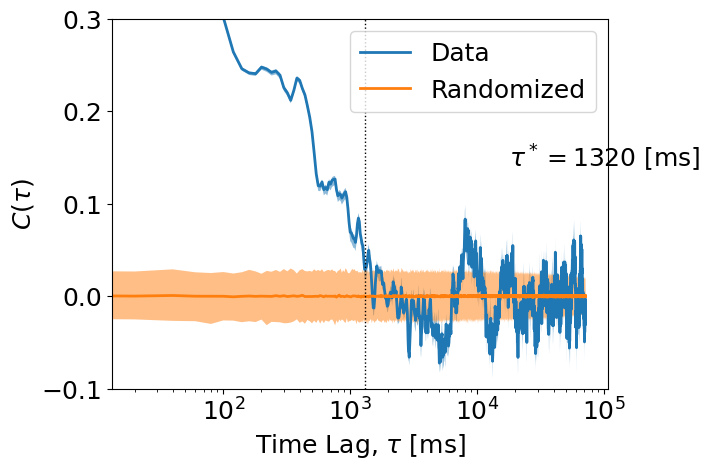

In [182]:
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(nrows=1, ncols=1)#, figsize=fig_size)
lw = 2
alpha_val = .5
## Plot the empirical autocorrelation
x_ = x
y_ = y_mu
z1_ = y_1
z2_ = y_2
c_ = cmap(0)
ax.plot(x_,y_,c = c_,lw=lw, label = 'Data')
ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)



## Plot the randomized autocorrelation
x_ = x
y_ = y_mu_rand
z1_ = y_1_rand
z2_ = y_2_rand
c_ = cmap(1)
ax.plot(x_,y_,c = c_,lw=lw, label = 'Randomized')
ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)


ax.plot([tau_star,tau_star],[-1,1],lw=1,color='black',ls=':')


## Layout stuff
ax.legend(loc='upper right')

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel(r'Time Lag, $\tau$ [ms]')#,labelpad=0)
ax.set_ylabel(r'$C(\tau)$')
ax.set_ylim(-0.1,0.3)


x_annot_tau = 0.8
y_annot_tau = 0.6
ax.annotate(r'$\tau^*=%s$ [ms]'%(int(tau_star)),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction');

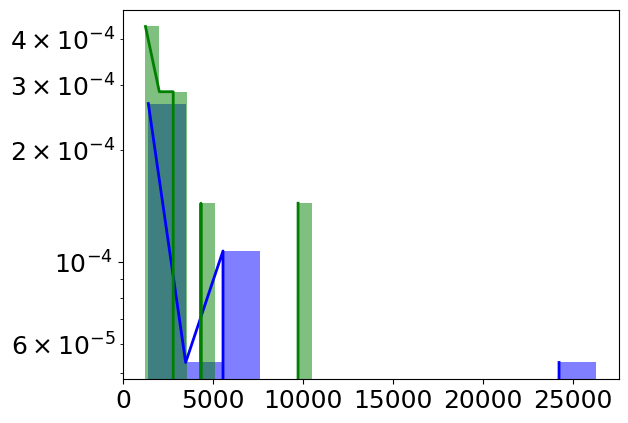

In [172]:
a,b,c = plt.hist(t1_span, bins = 12, color = 'blue', alpha = .5, density = True);
plt.plot(b[:-1],a, lw = 2, color ='blue')
a,b,c = plt.hist(t2_span, bins = 12, color = 'green', alpha =.5, density = True);
plt.plot(b[:-1],a, lw = 2, color ='green');
plt.yscale('log');

In [ ]:
# + dati in realtà migliora la stima e la abbassa

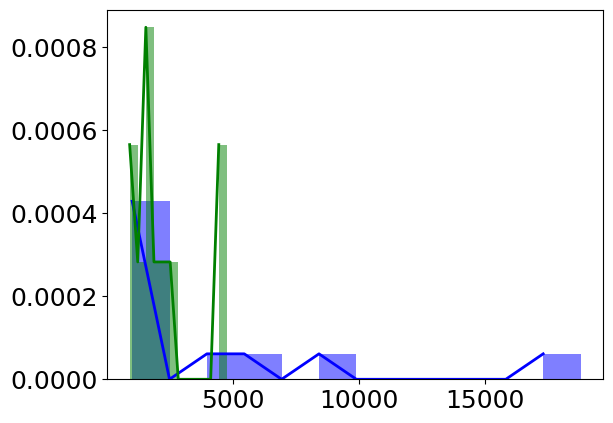

In [173]:
a,b,c = plt.hist(t1_en, bins = 12, color = 'blue', alpha = .5, density = True);
plt.plot(b[:-1],a, lw = 2, color ='blue')
a,b,c = plt.hist(t2_en, bins = 12, color = 'green', alpha =.5, density = True);
plt.plot(b[:-1],a, lw = 2, color ='green');
#plt.yscale('log');

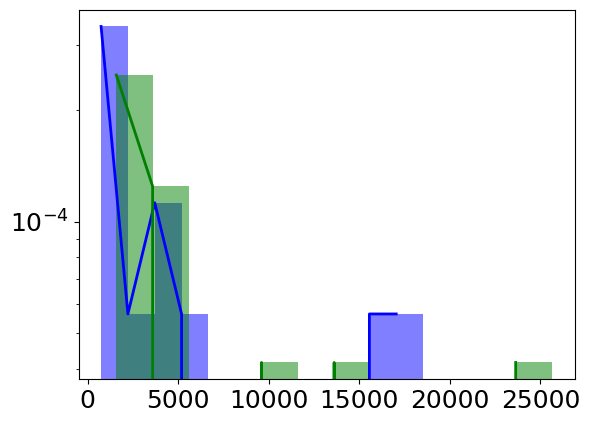

In [174]:
a,b,c = plt.hist(t1_frenc, bins = 12, color = 'blue', alpha = .5, density = True);
plt.plot(b[:-1],a, lw = 2, color ='blue')
a,b,c = plt.hist(t2_frenc, bins = 12, color = 'green', alpha =.5, density = True);
plt.plot(b[:-1],a, lw = 2, color ='green');
plt.yscale('log');

In [31]:
## sono di lunghezze diverse le timeseries
## è pe questo motivo che potrei vedere risultati strani 
#### dovrei fissarmi su certe lunghezze
## andrebbe ritestato
####.......
## sarebbero state da tranciare le serie... lo faccio?
data.shape[1]/500,data2.shape[1]/500, 

(142.926, 142.926)

In [32]:
### ORDER OF THE LANGUAGES
order = pd.read_excel('../../../Downloads/ordine lingue.xlsx')#1 en, 2 fr, 3 sp


subject_french = order[order["last language"]==2]["subject"].values

subject_en = order[order["last language"]==1]["subject"].values

subject_span = order[order["last language"]==3]["subject"].values

sub_fren = (list(set(subject_french) & set(good_sub)))
sub_span = (list(set(subject_span) & set(good_sub)))
sub_en = (list(set(subject_en) & set(good_sub)))


good_sub = np.asarray(good_sub)

#index. = np.where()

type(good_sub)

h = []
for k in sub_fren:
    #if k in good_sub:
    #h.append(np.where(k == good_sub)[0])
    h.append(good_sub.tolist().index(k))
print(h)        
#np.concatenate(h)

ll = np.concatenate([np.where(good_sub==i)[0] for i in sub_fren])

ll

def funct(sub, vec1, vec2):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    al2 = vec2[index]
    print(stats.ttest_rel(al1, al2,alternative = 'less') )
    
    

def funct2(sub, vec1):
    index = np.concatenate([np.where(good_sub==i)[0] for i in sub])
    #index = np.where(good_sub, sub_fren)
    al1 = vec1[index]
    #al2 = vec2[index]
    return al1
    #print(stats.ttest_rel(al1, al2,alternative = 'less') )
    

[22, 23, 13, 2, 29, 3, 4, 16, 5, 7, 27, 19]


In [33]:
lens=[]
for i in range(len(cc)):
    lens.append(len(cc[i][0]))
    
#lens=[]
for i in range(len(cc2)):
    lens.append(len(cc2[i][0]))
nn = min (lens)
print(nn)
cc_arr = np.zeros((len(cc),nn))
for i in range(len(cc)):
    cc_arr[i] = (cc[i][0][:nn])
#cc_arr = np.asarray(cc_arr)

#nn = min (lens)
print(nn)
cc2_arr = np.zeros((len(cc2),nn))
for i in range(len(cc2)):
    cc2_arr[i] = (cc2[i][0][:nn])
#cc_arr = np.asarray(cc_arr)


## CHECK SIGNAL LENGHTS AND EFFECT OF SIGNAL LENGTHS ON THIS

3574
3574


In [36]:
cc2_arr.shape[1]*10,cc_arr.shape[1]*10, 

(35740, 35740)

In [35]:
c1_frenc = funct2(sub_fren, cc_arr)
c1_span = funct2(sub_span, cc_arr)
c1_en= funct2(sub_en, cc_arr)

c2_frenc = funct2(sub_fren, cc2_arr)
c2_span = funct2(sub_span, cc2_arr)
c2_en= funct2(sub_en, cc2_arr)

In [37]:
arr1 = np.asarray([c1_frenc, c1_span, c1_en])
arr2 = np.asarray([c2_frenc, c2_span, c2_en])

C:\Users\Benedetta\AppData\Local\Temp\ipykernel_19032\998914840.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr1 = np.asarray([c1_frenc, c1_span, c1_en])
C:\Users\Benedetta\AppData\Local\Temp\ipykernel_19032\998914840.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.asarray([c2_frenc, c2_span, c2_en])


In [120]:
plt.rcParams['font.size'] = 14

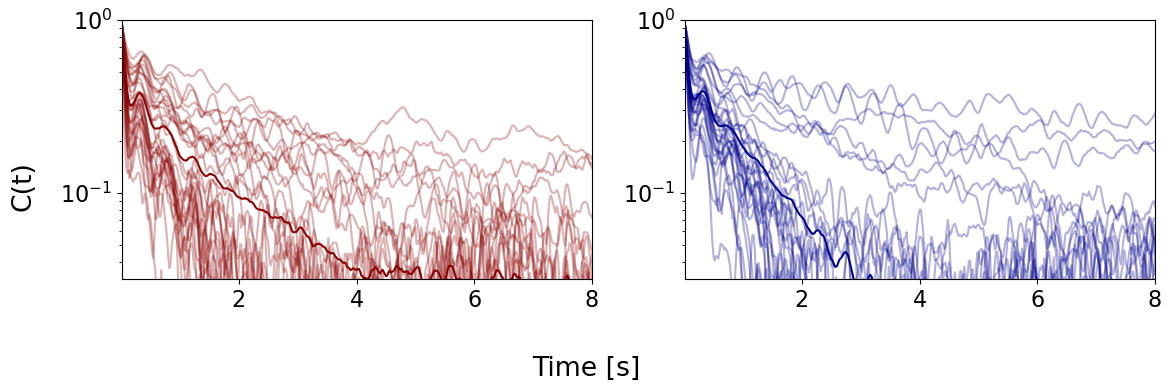

In [39]:
## thes = 3
time_in_sec = 8
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002


ax1.plot(lags,cc_arr.T,color ='darkred', alpha = .3)
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred', alpha = 1)

ax1.set_yscale('log')
ax1.set_xlim(0.01,time_in_sec)
ax1.set_ylim(10**-2.5,1);





lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002



ax2.plot(lags,cc2_arr.T,color ='darkblue', alpha = .3)
ax2.plot(lags,np.mean(cc2_arr,0),color ='darkblue', alpha = 1)

ax2.set_yscale('log')
ax2.set_xlim(0.01,time_in_sec)
ax2.set_ylim(10**-2.5,1);



fig.supxlabel('Time [s]')
fig.supylabel('C(t)')

plt.tight_layout();

ax2.set_ylim(10**-1.5,1);
ax1.set_ylim(10**-1.5,1);

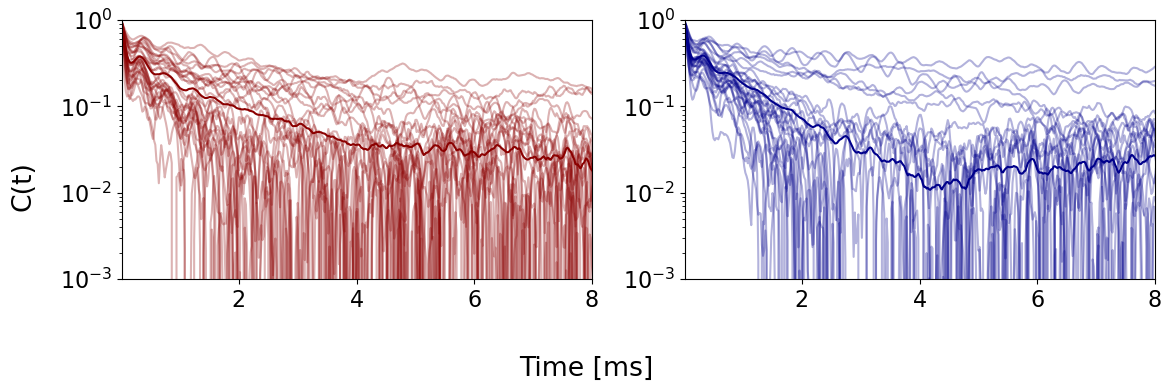

In [40]:
## thes = 3
time_in_sec = 8
#plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002


ax1.plot(lags,cc_arr.T,color ='darkred', alpha = .3)
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred', alpha = 1)

ax1.set_yscale('log')
ax1.set_xlim(0.01,time_in_sec)
ax1.set_ylim(10**-2.5,1);

lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002



ax2.plot(lags,cc2_arr.T,color ='darkblue', alpha = .3)
ax2.plot(lags,np.mean(cc2_arr,0),color ='darkblue', alpha = 1)

ax2.set_yscale('log')
ax2.set_xlim(0.01,time_in_sec)
ax2.set_ylim(10**-2.5,1);



fig.supxlabel('Time [ms]')
fig.supylabel('C(t)')

plt.tight_layout();

ax2.set_ylim(10**-3,1);
ax1.set_ylim(10**-3,1);


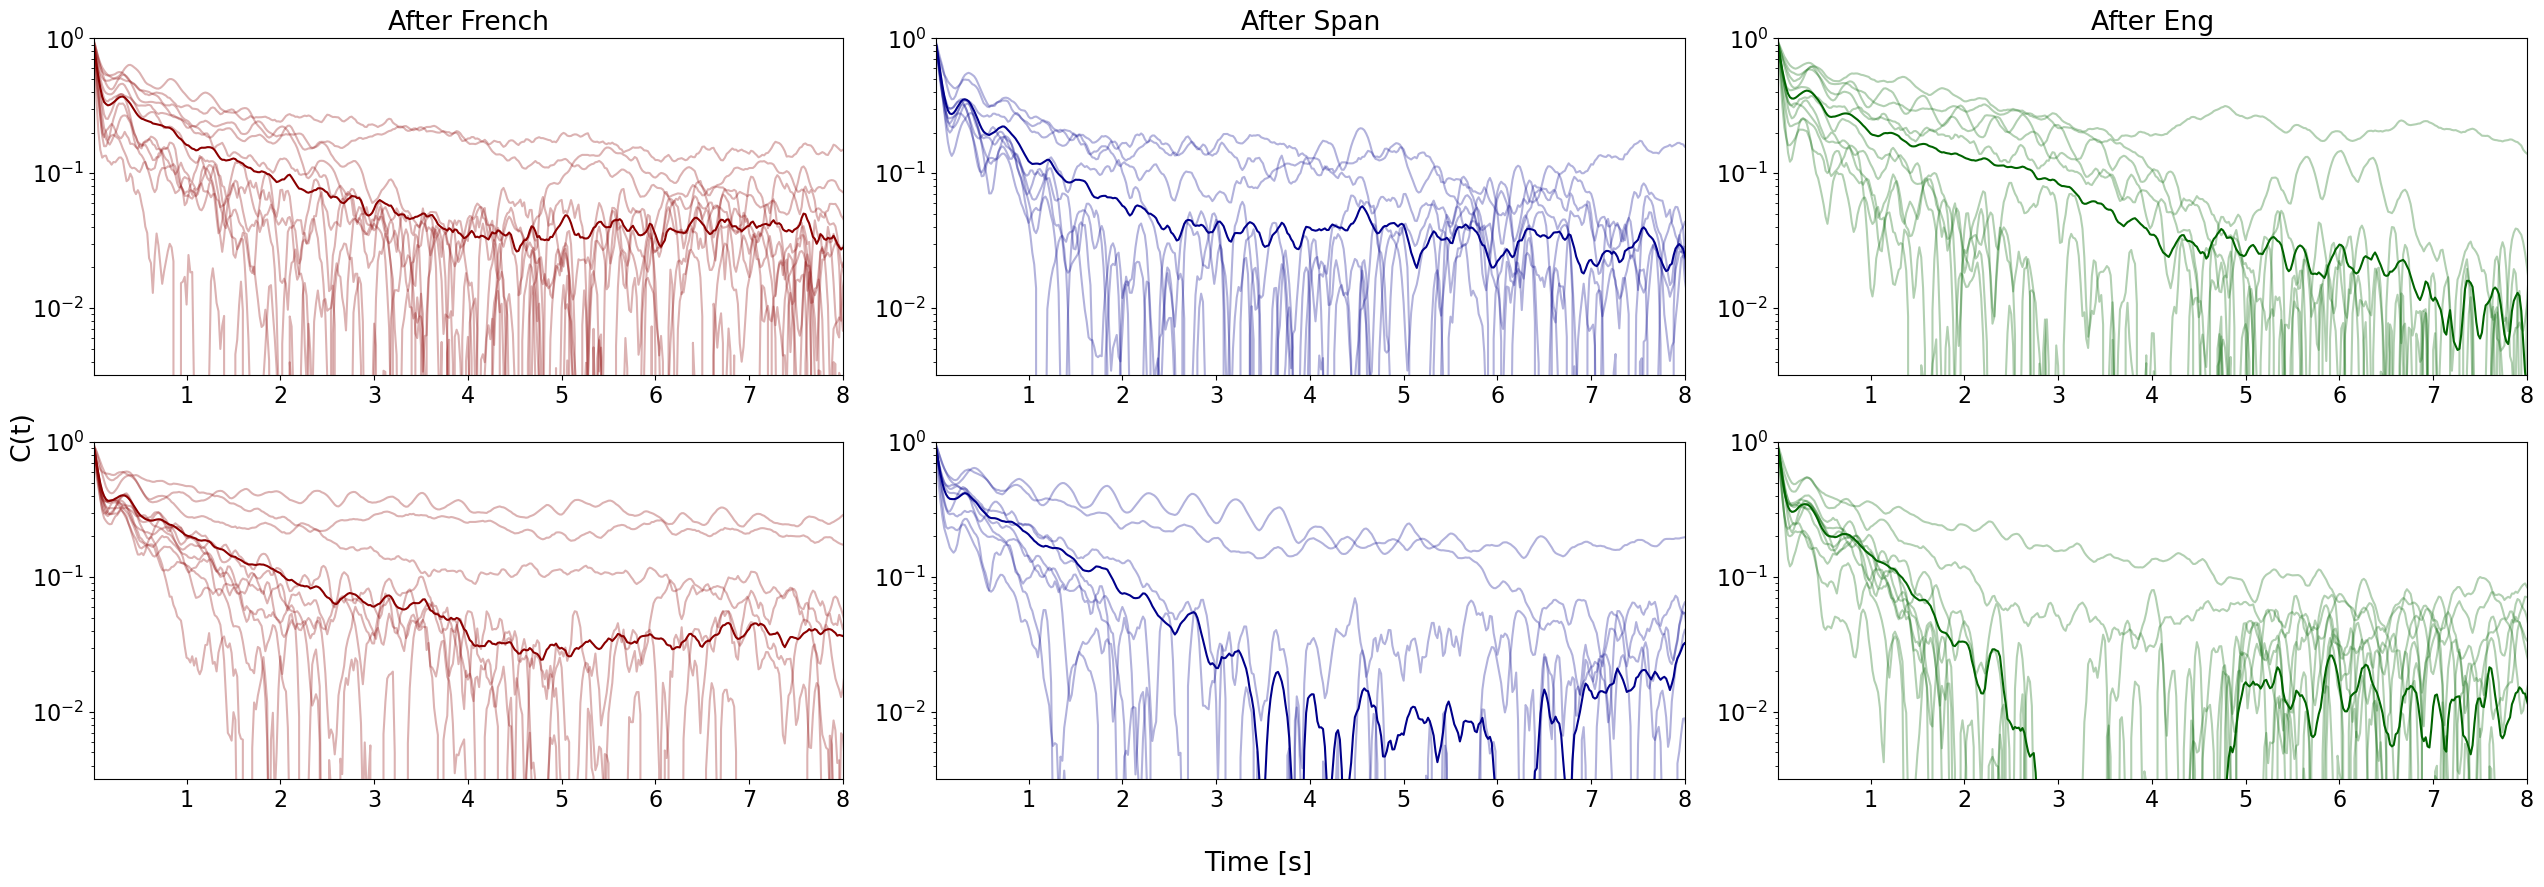

In [41]:
## thes = 3
time_in_sec = 8
#plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (26,9))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)


lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002


ax1.plot(lags,arr1[0].T,color ='darkred', alpha = .3)
ax1.plot(lags,np.mean(arr1[0],0),color ='darkred', alpha = 1)

ax1.set_yscale('log')
ax1.set_xlim(0.01,time_in_sec)
ax1.set_ylim(10**-2.5,1);


ax2.plot(lags,arr1[1].T,color ='darkblue', alpha = .3)
ax2.set_yscale('log')
ax2.set_xlim(0.01,time_in_sec)
ax2.set_ylim(10**-2.5,1);
ax2.plot(lags,np.mean(arr1[1],0),color ='darkblue', alpha = 1)

ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
ax3.set_yscale('log')
ax3.set_xlim(0.01,time_in_sec)
ax3.set_ylim(10**-2.5,1);
ax3.plot(lags,np.mean(arr1[2],0),color ='darkgreen', alpha = 1)





lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002

ax4.plot(lags,arr2[0].T,color ='darkred', alpha = .3)
ax4.set_yscale('log')
ax4.set_xlim(0.01,time_in_sec)
ax4.set_ylim(10**-2.5,1);
ax4.plot(lags,np.mean(arr2[0],0),color ='darkred', alpha = 1)


ax5.plot(lags,arr2[1].T,color ='darkblue', alpha = .3)
ax5.set_yscale('log')
ax5.set_xlim(0.01,time_in_sec)
ax5.set_ylim(10**-2.5,1);
ax5.plot(lags,np.mean(arr2[1],0),color ='darkblue', alpha = 1)


ax6.plot(lags,arr2[2].T,color ='darkgreen', alpha = .3)
ax6.set_yscale('log')
ax6.set_xlim(0.01,time_in_sec)
ax6.set_ylim(10**-2.5,1);
ax6.plot(lags,np.mean(arr2[2],0),color ='darkgreen', alpha = 1)



fig.supxlabel('Time [s]')
fig.supylabel('C(t)')
ax1.set_title('After French')
ax2.set_title('After Span')
ax3.set_title('After Eng');
plt.tight_layout();

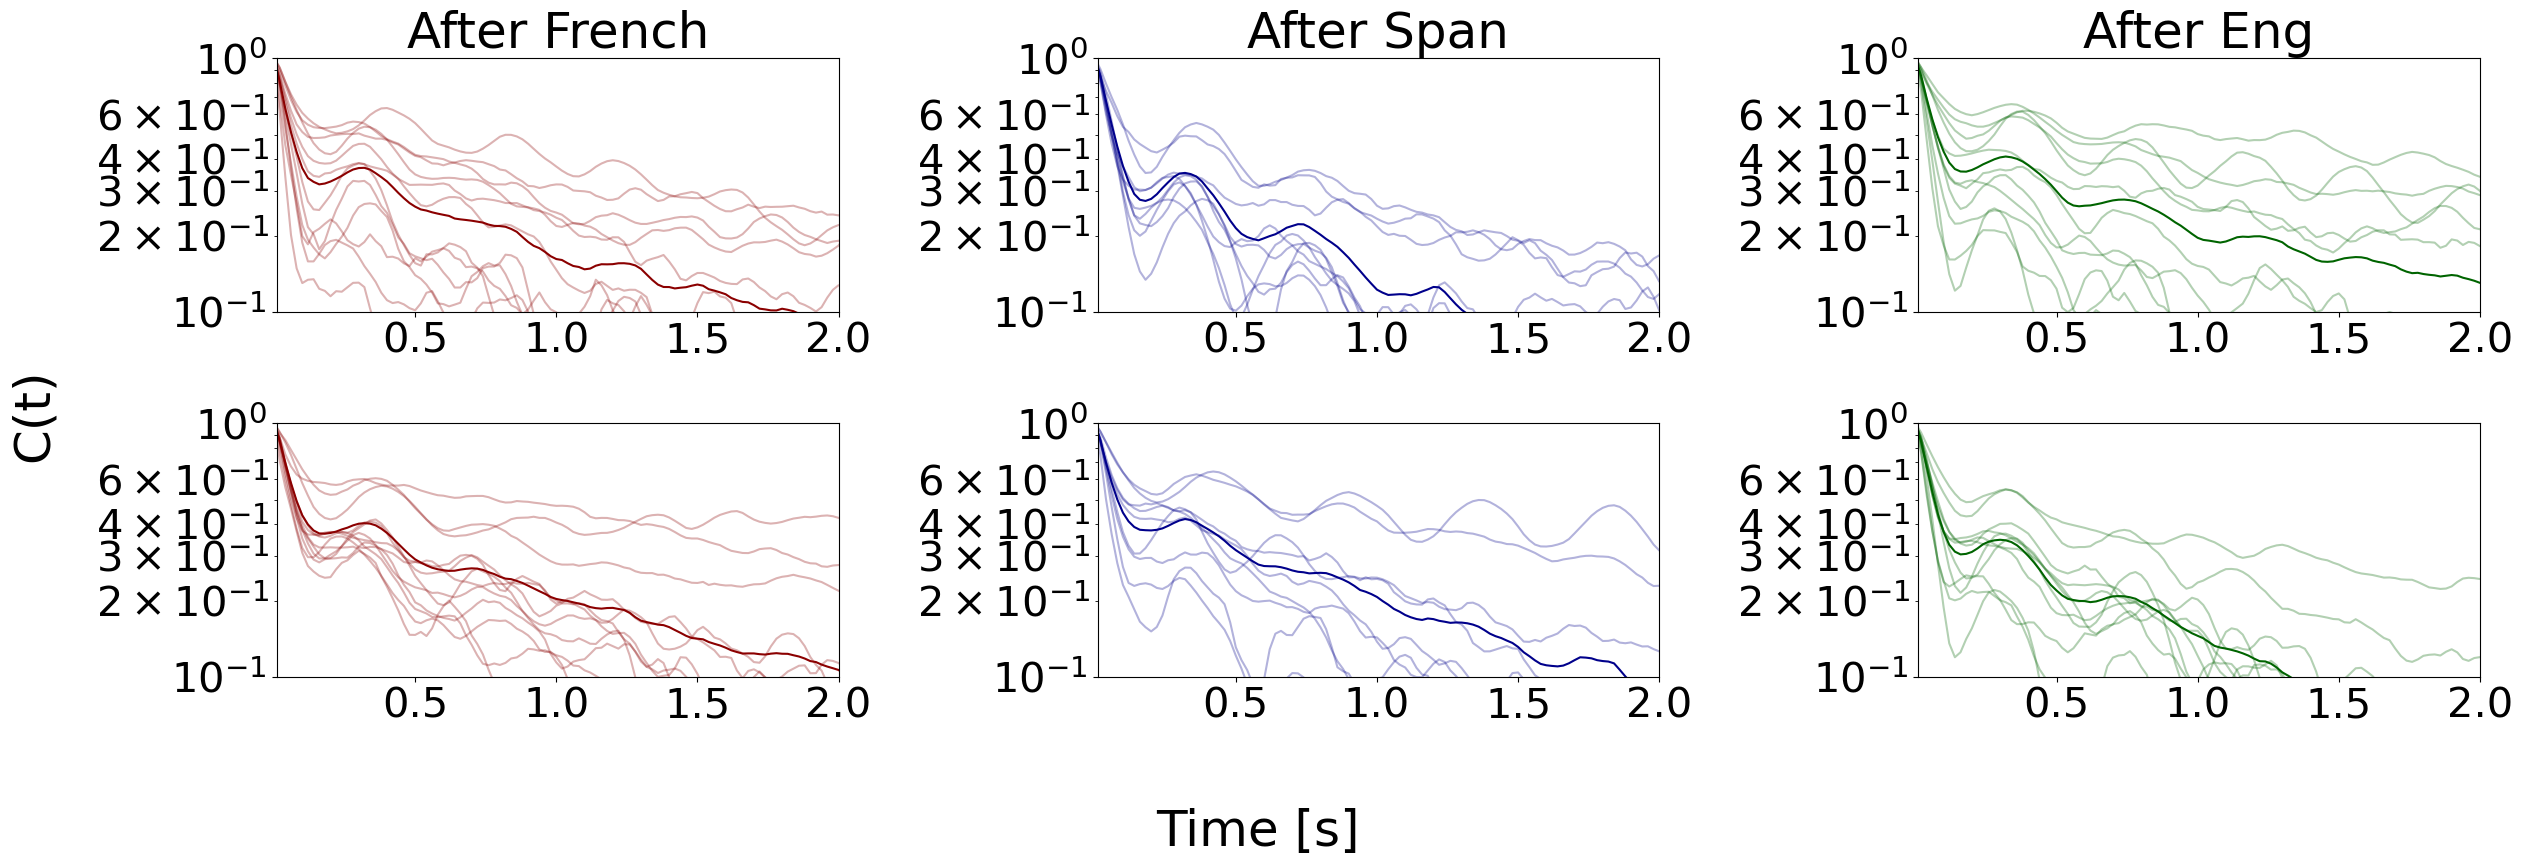

In [42]:
plt.rcParams['font.size']=30
## thes = 3
time_in_sec = 2
#plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (26,9))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)


lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002


ax1.plot(lags,arr1[0].T,color ='darkred', alpha = .3)
ax1.plot(lags,np.mean(arr1[0],0),color ='darkred', alpha = 1)

ax1.set_yscale('log')
ax1.set_xlim(0.01,time_in_sec)
ax1.set_ylim(10**-1,1);



ax2.plot(lags,arr1[1].T,color ='darkblue', alpha = .3)
ax2.set_yscale('log')
ax2.set_xlim(0.01,time_in_sec)
ax2.set_ylim(10**-1,1);
ax2.plot(lags,np.mean(arr1[1],0),color ='darkblue', alpha = 1)

ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
ax3.set_yscale('log')
ax3.set_xlim(0.01,time_in_sec)
ax3.set_ylim(10**-1,1);
ax3.plot(lags,np.mean(arr1[2],0),color ='darkgreen', alpha = 1)





lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002

ax4.plot(lags,arr2[0].T,color ='darkred', alpha = .3)
ax4.set_yscale('log')
ax4.set_xlim(0.01,time_in_sec)
ax4.set_ylim(10**-1,1);
ax4.plot(lags,np.mean(arr2[0],0),color ='darkred', alpha = 1)


ax5.plot(lags,arr2[1].T,color ='darkblue', alpha = .3)
ax5.set_yscale('log')
ax5.set_xlim(0.01,time_in_sec)
ax5.set_ylim(10**-1,1);
ax5.plot(lags,np.mean(arr2[1],0),color ='darkblue', alpha = 1)


ax6.plot(lags,arr2[2].T,color ='darkgreen', alpha = .3)
ax6.set_yscale('log')
ax6.set_xlim(0.01,time_in_sec)
ax6.set_ylim(10**-1.,1);
ax6.plot(lags,np.mean(arr2[2],0),color ='darkgreen', alpha = 1)



fig.supxlabel('Time [s]')
fig.supylabel('C(t)')
ax1.set_title('After French')
ax2.set_title('After Span')
ax3.set_title('After Eng');

plt.tight_layout();

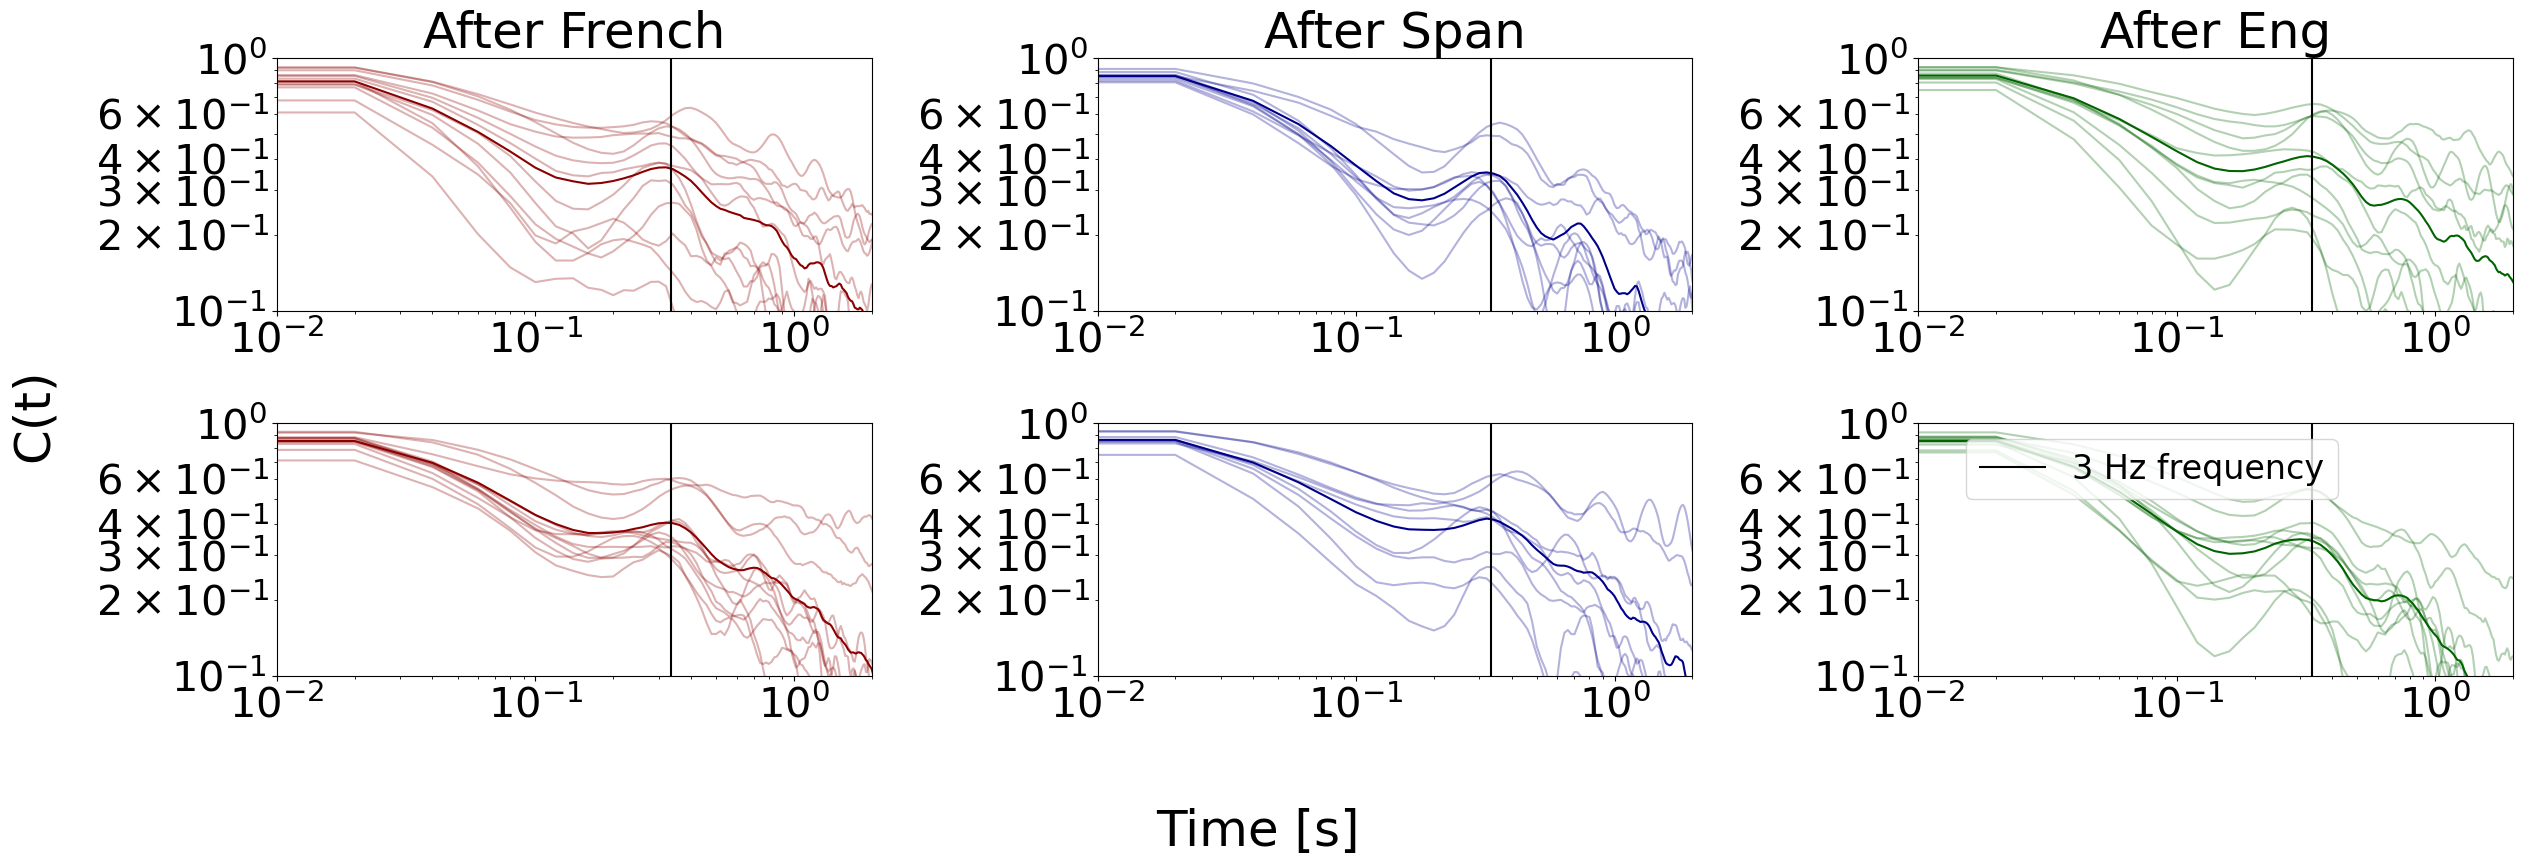

In [57]:
plt.rcParams['font.size']=30
## thes = 3
time_in_sec = 2
#plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (26,9))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)


lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002


ax1.plot(lags,arr1[0].T,color ='darkred', alpha = .3)
ax1.plot(lags,np.mean(arr1[0],0),color ='darkred', alpha = 1)

ax1.set_yscale('log')
ax1.set_xlim(0.01,time_in_sec)
ax1.set_ylim(10**-1,1);



ax2.plot(lags,arr1[1].T,color ='darkblue', alpha = .3)
ax2.set_yscale('log')
ax2.set_xlim(0.01,time_in_sec)
ax2.set_ylim(10**-1,1);
ax2.plot(lags,np.mean(arr1[1],0),color ='darkblue', alpha = 1)

ax3.plot(lags,arr1[2].T,color ='darkgreen', alpha = .3)
ax3.set_yscale('log')
ax3.set_xlim(0.01,time_in_sec)
ax3.set_ylim(10**-1,1);
ax3.plot(lags,np.mean(arr1[2],0),color ='darkgreen', alpha = 1)





lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002

ax4.plot(lags,arr2[0].T,color ='darkred', alpha = .3)
ax4.set_yscale('log')
ax4.set_xlim(0.01,time_in_sec)
ax4.set_ylim(10**-1,1);
ax4.plot(lags,np.mean(arr2[0],0),color ='darkred', alpha = 1)


ax5.plot(lags,arr2[1].T,color ='darkblue', alpha = .3)
ax5.set_yscale('log')
ax5.set_xlim(0.01,time_in_sec)
ax5.set_ylim(10**-1,1);
ax5.plot(lags,np.mean(arr2[1],0),color ='darkblue', alpha = 1)


ax6.plot(lags,arr2[2].T,color ='darkgreen', alpha = .3)
ax6.set_yscale('log')
ax6.set_xlim(0.01,time_in_sec)
ax6.set_ylim(10**-1.,1);
ax6.plot(lags,np.mean(arr2[2],0),color ='darkgreen', alpha = 1)



fig.supxlabel('Time [s]')
fig.supylabel('C(t)')
ax1.set_title('After French')
ax2.set_title('After Span')
ax3.set_title('After Eng');

hh =[ax1,ax2,ax3,ax4,ax5,ax6]
for i in hh:
    i.set_xscale('log')
    i.set_yscale('log')
    if i == ax6:
        i.vlines(1/3,10**-2,1, color ='black', label = '3 Hz frequency')
    else:
        i.vlines(1/3,10**-2,1, color ='black')

plt.legend(loc =(0.08,0.7), fontsize = 24)
plt.tight_layout();

In [43]:
lens=[]
for i in range(len(cc)):
    lens.append(len(cc[i][0]))
nn = min (lens)
#print(nn)
y1_arr = np.zeros((len(cc),nn))
for i in range(len(cc)):
    y1_arr[i] = (cc[i][1][:nn])
    
    
#print(nn)
y2_arr = np.zeros((len(cc),nn))
for i in range(len(cc)):
    y2_arr[i] = (cc[i][2][:nn])
#cc_arr = np.asarray(cc_arr)
lens=[]
for i in range(len(cc2)):
    lens.append(len(cc2[i][0]))
nn = min (lens)
#print(nn)
y12_arr = np.zeros((len(cc2),nn))
for i in range(len(cc2)):
    y12_arr[i] = (cc2[i][1][:nn])
#cc_arr = np.asarray(cc_arr)

y22_arr = np.zeros((len(cc2),nn))
for i in range(len(cc2)):
    y22_arr[i] = (cc2[i][2][:nn])
#cc_arr =

In [44]:
lens=[]
for i in range(len(cc)):
    lens.append(len(cc[i][0]))
nn = min (lens)
print(nn)
cc_arr = np.zeros((len(cc),nn))
for i in range(len(cc)):
    cc_arr[i] = (cc[i][0][:nn])
#cc_arr = np.asarray(cc_arr)
lens=[]
for i in range(len(cc2)):
    lens.append(len(cc2[i][0]))
nn = min (lens)
print(nn)
cc2_arr = np.zeros((len(cc2),nn))
for i in range(len(cc2)):
    cc2_arr[i] = (cc2[i][0][:nn])
#cc_arr = np.asarray(cc_arr)



3574
3574


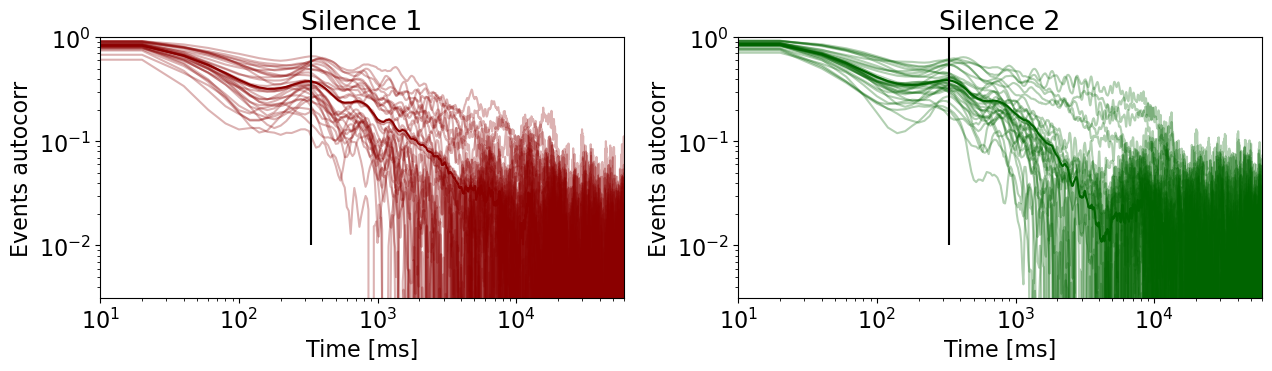

In [45]:
## thes = 3
time_in_sec = 60
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002*1000

for i in range(len(cc_arr)):
    ax1.plot(lags,cc_arr[i],color ='darkred', alpha = .3)
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred');
ax1.fill_between(lags,np.mean(y1_arr,0), np.mean(y2_arr,0), color = 'darkred', alpha = .3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.vlines(1/3*1000, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01*1000,time_in_sec*1000)
ax1.set_ylim(10**-2.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002*1000

for i in range(len(cc_arr)):
    ax2.plot(lags,cc2_arr[i],color ='darkgreen', alpha = .3)

ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');

ax2.fill_between(lags,np.mean(y12_arr,0), np.mean(y22_arr,0), color = 'darkgreen', alpha = .3)

ax2.vlines(1/3*1000, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Time [ms]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01*1000,time_in_sec*1000)
ax2.set_ylim(10**-2.5,1);
plt.tight_layout();

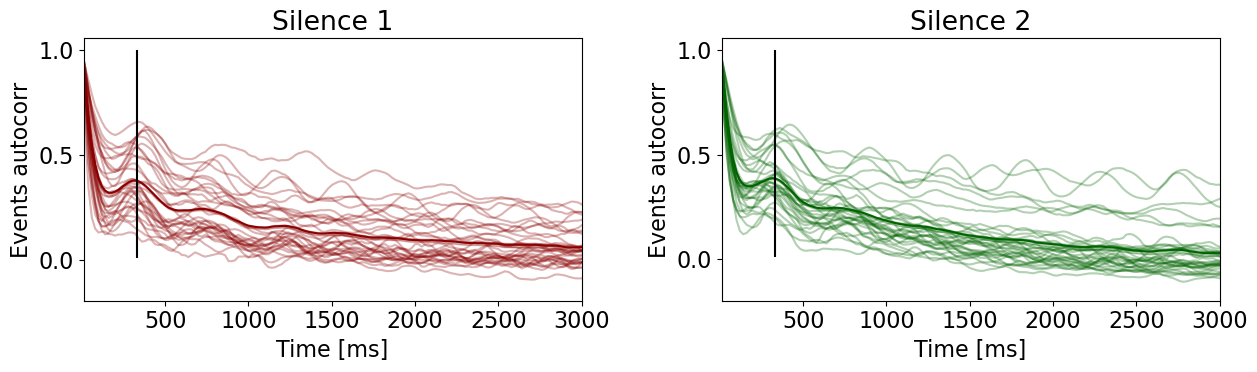

In [46]:
## thes = 3
time_in_sec = 3
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002*1000

for i in range(len(cc_arr)):
    ax1.plot(lags,cc_arr[i],color ='darkred', alpha = .3)
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred');
ax1.fill_between(lags,np.mean(y1_arr,0), np.mean(y2_arr,0), color = 'darkred', alpha = .3)
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.vlines(1/3*1000, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax1.set_xlabel('Time [ms]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01*1000,time_in_sec*1000)
#ax1.set_ylim(10**-2.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002*1000

for i in range(len(cc_arr)):
    ax2.plot(lags,cc2_arr[i],color ='darkgreen', alpha = .3)

ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');

ax2.fill_between(lags,np.mean(y12_arr,0), np.mean(y22_arr,0), color = 'darkgreen', alpha = .3)

ax2.vlines(1/3*1000, 10**-2,1,color = 'black', label ='3 Hz frequency')

#ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Time [ms]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01*1000,time_in_sec*1000)
#ax2.set_ylim(10**-2.5,1);
plt.tight_layout();

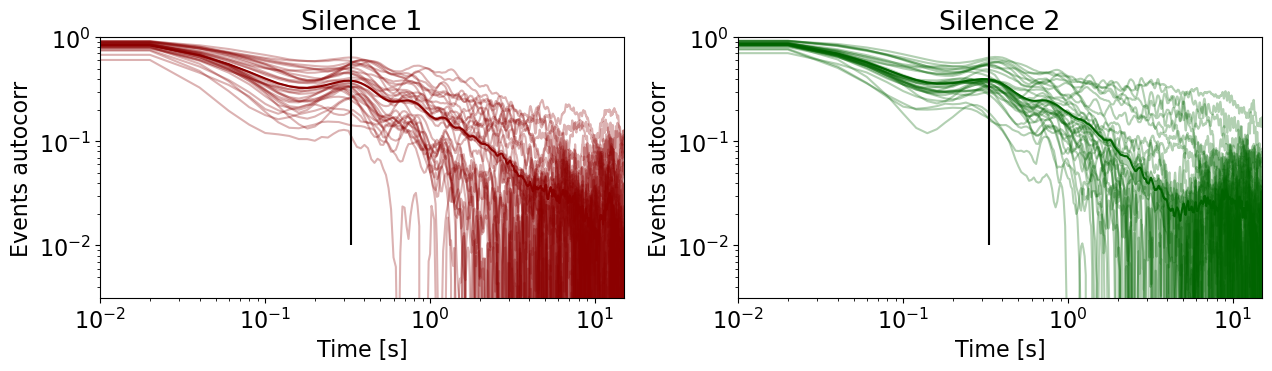

In [52]:
## thes = 3
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002

for i in range(len(cc_arr)):
    ax1.plot(lags,cc_arr[i],color ='darkred', alpha = .3)
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred');
ax1.fill_between(lags,np.mean(y1_arr,0), np.mean(y2_arr,0), color = 'darkred', alpha = .3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01,15)
ax1.set_ylim(10**-2.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002


for i in range(len(cc_arr)):
    ax2.plot(lags,cc2_arr[i],color ='darkgreen', alpha = .3)
ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');

ax2.fill_between(lags,np.mean(y12_arr,0), np.mean(y22_arr,0), color = 'darkgreen', alpha = .3)

ax2.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,15)
ax2.set_ylim(10**-2.5,1);
plt.tight_layout();
## con thres èiù basse si becca un po' di noise mi sa

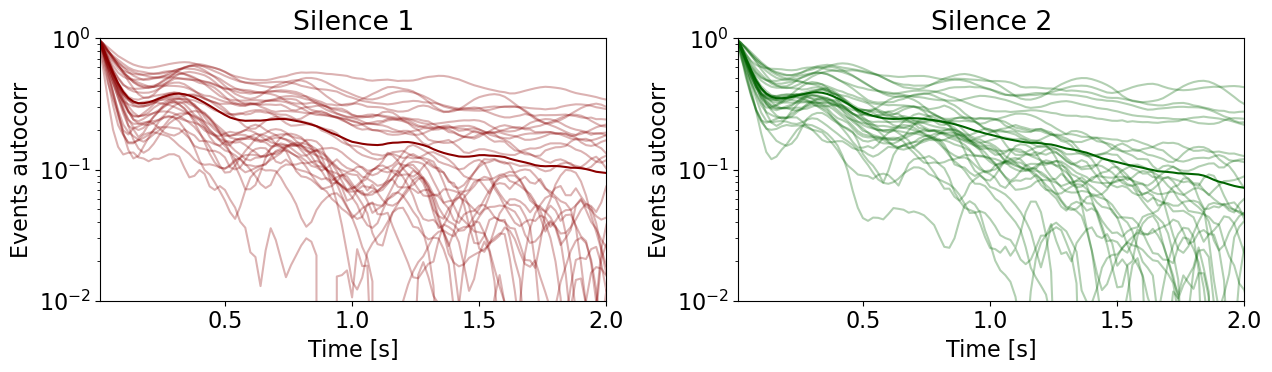

In [49]:
## thes = 1
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
for i in range(len(cc_arr)):
    ax1.plot(lags,cc_arr[i],color ='darkred', alpha = .3);
    
ax1.plot(np.arange(0,len(cc_arr[0]),1)*interv*0.002,np.mean(cc_arr,0),color ='darkred');
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01,2)
ax1.set_ylim(10**-2,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002

for i in range(len(cc2_arr)):
    ax2.plot(lags,cc2_arr[i],color ='darkgreen', alpha = .3);
ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,2)
ax2.set_ylim(10**-2,1);
plt.tight_layout();


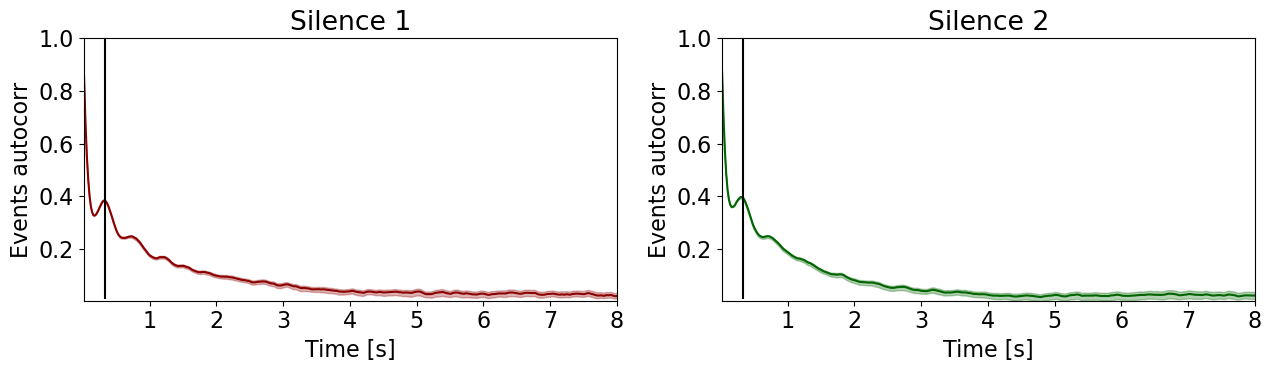

In [54]:
#thres = 3
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
   
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred');
ax1.fill_between(lags,np.mean(y1_arr,0), np.mean(y2_arr,0), color = 'darkred', alpha = .3)
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01,8)
ax1.set_ylim(10**-2.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002


ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');

ax2.fill_between(lags,np.mean(y12_arr,0), np.mean(y22_arr,0), color = 'darkgreen', alpha = .3)

ax2.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

#ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,8)
ax2.set_ylim(10**-2.5,1);
plt.tight_layout();


In [230]:
#vspan anche importante
#hspan 

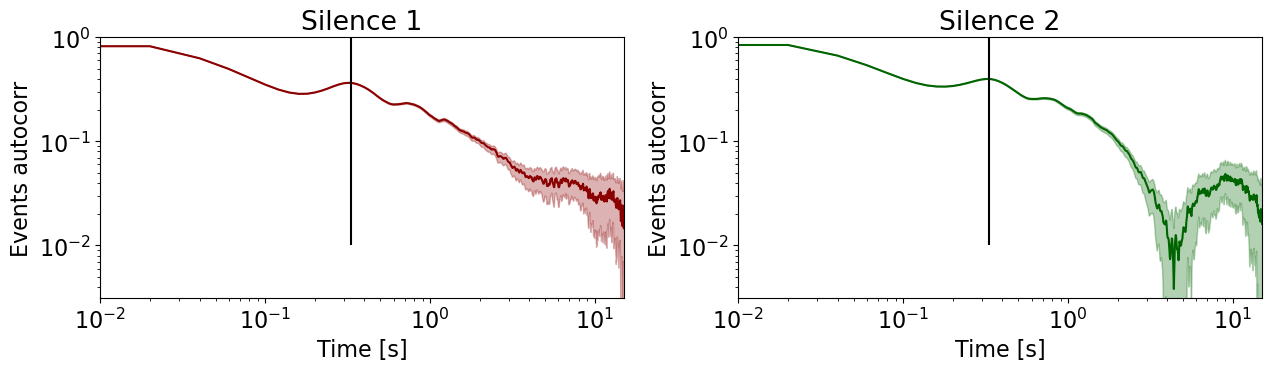

In [221]:

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
   
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred');
ax1.fill_between(lags,np.mean(y1_arr,0), np.mean(y2_arr,0), color = 'darkred', alpha = .3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01,15)
ax1.set_ylim(10**-2.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002


ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');

ax2.fill_between(lags,np.mean(y12_arr,0), np.mean(y22_arr,0), color = 'darkgreen', alpha = .3)

ax2.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,15)
ax2.set_ylim(10**-2.5,1);
plt.tight_layout();


In [ ]:
## thresholding kees most component of signal ??

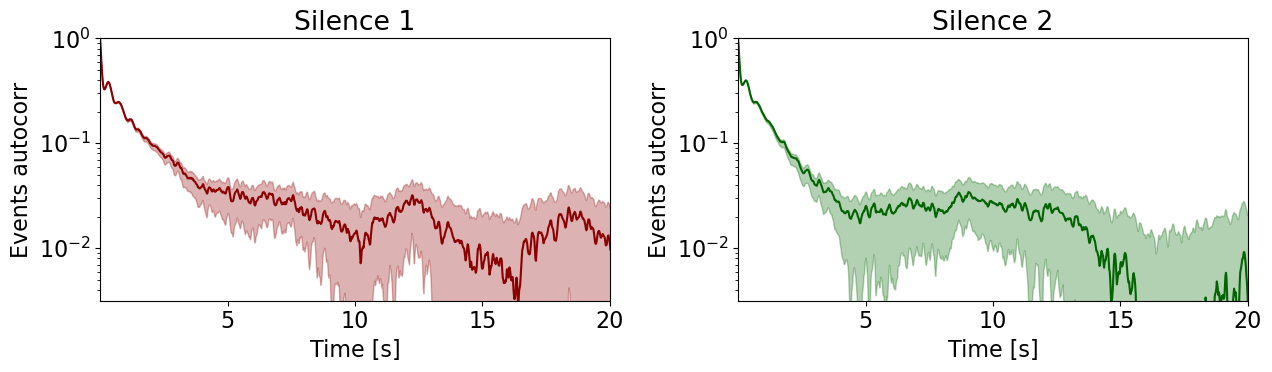

In [56]:

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
   
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred');
ax1.fill_between(lags,np.mean(y1_arr,0), np.mean(y2_arr,0), color = 'darkred', alpha = .3)
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01,20)
ax1.set_ylim(10**-2.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002


ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');

ax2.fill_between(lags,np.mean(y12_arr,0), np.mean(y22_arr,0), color = 'darkgreen', alpha = .3)


ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,20)
ax2.set_ylim(10**-2.5,1);
plt.tight_layout();


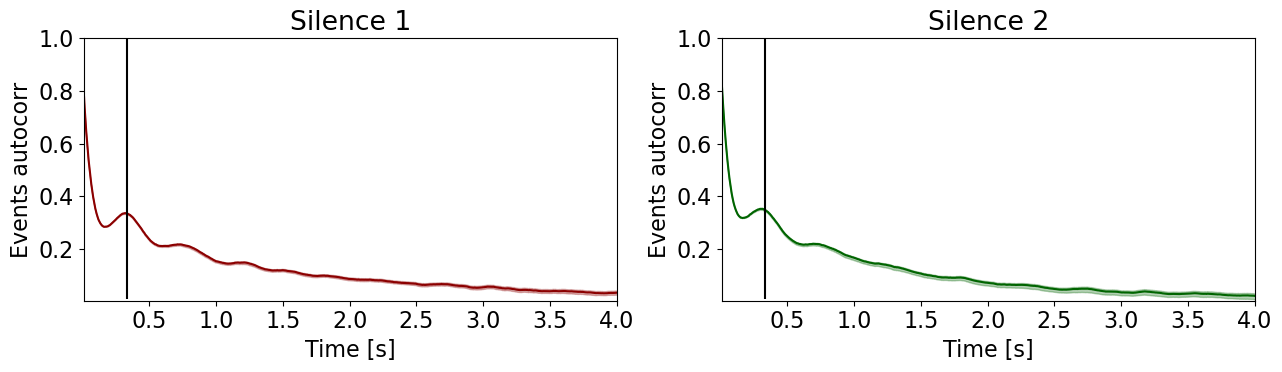

In [210]:

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
   
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred');
ax1.fill_between(lags,np.mean(y1_arr,0), np.mean(y2_arr,0), color = 'darkred', alpha = .3)
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax1.set_xlim(0.01,4)
ax1.set_ylim(10**-2.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002


ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');

ax2.fill_between(lags,np.mean(y12_arr,0), np.mean(y22_arr,0), color = 'darkgreen', alpha = .3)

ax2.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

#ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,4)
ax2.set_ylim(10**-2.5,1);
plt.tight_layout();

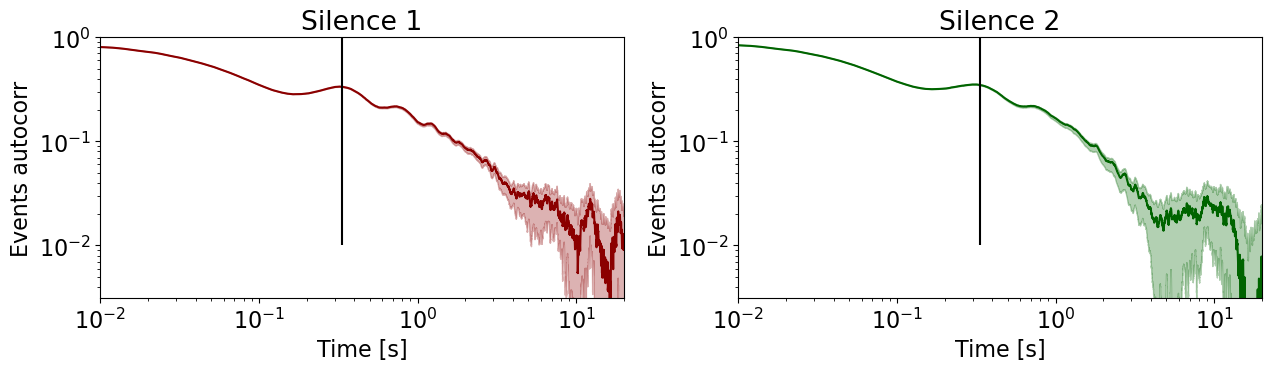

In [208]:

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
   
ax1.plot(lags,np.mean(cc_arr,0),color ='darkred');
ax1.fill_between(lags,np.mean(y1_arr,0), np.mean(y2_arr,0), color = 'darkred', alpha = .3)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax1.set_xlim(0.01,20)
ax1.set_ylim(10**-2.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002


ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');

ax2.fill_between(lags,np.mean(y12_arr,0), np.mean(y22_arr,0), color = 'darkgreen', alpha = .3)

ax2.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,20)
ax2.set_ylim(10**-2.5,1);
plt.tight_layout();


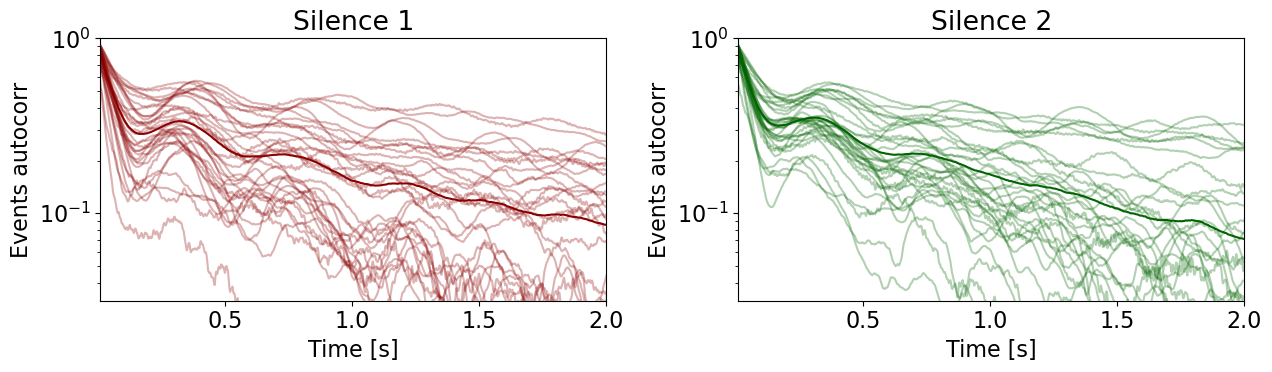

In [191]:

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
for i in range(len(cc_arr)):
    ax1.plot(lags,cc_arr[i],color ='darkred', alpha = .3);
    
ax1.plot(np.arange(0,len(cc_arr[0]),1)*interv*0.002,np.mean(cc_arr,0),color ='darkred');
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01,2)
ax1.set_ylim(10**-1.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002

for i in range(len(cc2_arr)):
    ax2.plot(lags,cc2_arr[i],color ='darkgreen', alpha = .3);
ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,2)
ax2.set_ylim(10**-1.5,1);
plt.tight_layout();



In [ ]:
cc2_arr.shape

In [88]:

cc = []
cc2 = []
interv = 10
for i, subj in enumerate(subjs):
    #print(f'\n\n########## SUBJ {subj} ({i+1}/{len(subjs)})##########')
    s1 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence1 (continuous).mat')
    s2 = loadmat(f'BB{subj}_Filtered (1-100)/Silence (500)/BB{subj} silence2 (continuous).mat')
    
    
    data = s1['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    if idx_down > 0 or idx_up < data.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data.shape[1]:
            idx_up -= 1
        data = data[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data = data[list(idx_accepted), idx_down:idx_up]
    nchan = data.shape[0]
    
    data2 = s2['eeg_rest'].astype('float')
    rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    if idx_down > 0 or idx_up < data2.shape[1]:
        if idx_down > 0:
            idx_down +=1
        if idx_up < data2.shape[1]:
            idx_up -= 1
        data2 = data2[:,idx_down:idx_up]
        rej, idx_down, idx_up = find_bad_channels(data2, verbose = False)
    idx_accepted = np.sort([np.where(ch_names == i)[0][0] for i in list(set(ch_names) - set(rej))])
    data2 = data2[list(idx_accepted), idx_down:idx_up]
    nchan2 = data2.shape[0]
    if nchan >= 5 and nchan2 >=5:
        
        
        #print('doing')
        c,tau = autocorr_events(data.T,2,interv)
        #print(len(c))
        cc.append(c)
        
        
        c,tau = autocorr_events(data2.T,2,interv)
        #print(len(c))
        cc2.append(c)
        

In [121]:
data2.shape[1]

82745

In [89]:
nn = min(list(map(len,cc)))
cc_arr = []
for i in cc:
    cc_arr.append(i[:nn])
cc_arr = np.asarray(cc_arr)


nn = min(list(map(len,cc2)))
cc2_arr = []
for i in cc2:
    cc2_arr.append(i[:nn])
cc2_arr = np.asarray(cc2_arr)

In [142]:
180/20, #secondi

(9.0,)

In [139]:
len(tau)/500, len(cc2_arr[1][:1000])/500

(90.968, 2.0)

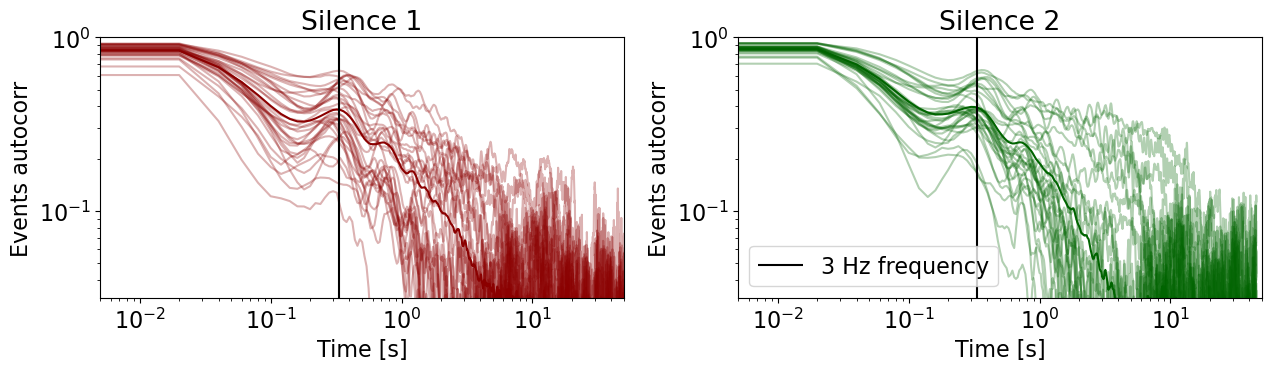

In [109]:

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
for i in range(len(cc_arr)):
    ax1.plot(lags,cc_arr[i],color ='darkred', alpha = .3);
    
ax1.plot(np.arange(0,len(cc_arr[0]),1)*interv*0.002,np.mean(cc_arr,0),color ='darkred');
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.005,50)
ax1.set_ylim(10**-1.5,1)
ax1.vlines(1/3, 10**-2,1,color = 'black')


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002

for i in range(len(cc2_arr)):
    ax2.plot(lags,cc2_arr[i],color ='darkgreen', alpha = .3);
ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.005,50)
ax2.set_ylim(10**-1.5,1);
ax2.vlines(1/3, 10**-2,1,color = 'black', label ='3 Hz frequency')
ax2.legend();
plt.tight_layout();



In [ ]:
## perchè il silenzio 2 sembra avere meno autocorr time???

In [107]:
#10ms gamma, 100 ms 10 Hz

0.001

In [112]:
1/500*1000

2.0

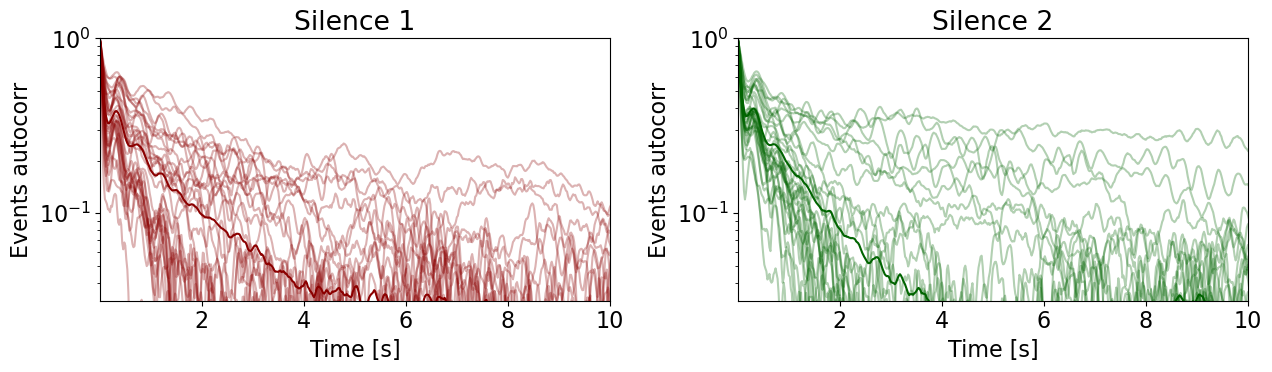

In [57]:

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
for i in range(len(cc_arr)):
    ax1.plot(lags,cc_arr[i],color ='darkred', alpha = .3);
    
ax1.plot(np.arange(0,len(cc_arr[0]),1)*interv*0.002,np.mean(cc_arr,0),color ='darkred');
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01,10)
ax1.set_ylim(10**-1.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002

for i in range(len(cc2_arr)):
    ax2.plot(lags,cc2_arr[i],color ='darkgreen', alpha = .3);
ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,10)
ax2.set_ylim(10**-1.5,1);
plt.tight_layout();



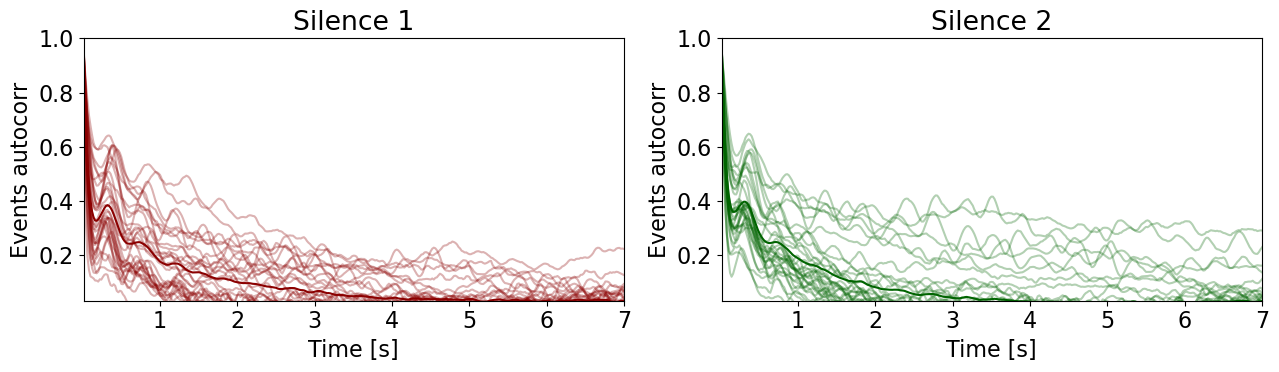

In [116]:

plt.rcParams['font.size'] = 16
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
lags = np.arange(0,len(cc_arr[0]),1)*interv*0.002
for i in range(len(cc_arr)):
    ax1.plot(lags,cc_arr[i],color ='darkred', alpha = .3);
    
ax1.plot(np.arange(0,len(cc_arr[0]),1)*interv*0.002,np.mean(cc_arr,0),color ='darkred');
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Events autocorr')
ax1.set_title('Silence 1')
ax1.set_xlim(0.01,7)
ax1.set_ylim(10**-1.5,1)


lags = np.arange(0,len(cc2_arr[0]),1)*interv*0.002

for i in range(len(cc2_arr)):
    ax2.plot(lags,cc2_arr[i],color ='darkgreen', alpha = .3);
ax2.plot(lags,np.mean(cc2_arr,0), color ='darkgreen');
#ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Events autocorr')
ax2.set_title('Silence 2');
ax2.set_xlim(0.01,7)
ax2.set_ylim(10**-1.5,1);
plt.tight_layout();


In [ ]:
## perchè il silenzio 2 sembra avere meno autocorr time???